In [1]:
#Imports
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from astropy.table import Table

In [149]:
#Load TNG
basePath = 'D:/Buhv2020Work/Illustris-3/output'
snapshot_ind = 66 #redshift ?

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)

subhalo_keys = (list(subhalo_grp.keys()))
halo_keys = (list(halo_grp.keys()))

subhalo_table = Table({'SubhaloBHMass': subhalo_grp['SubhaloBHMass']})
for i in range(2, len(subhalo_keys)):
    subhalo_table.add_column(subhalo_grp[str(subhalo_keys[i])], name=str(subhalo_keys[i]))
    
halo_table = Table({'GroupBHMass': halo_grp['GroupBHMass']})
for i in range(2, len(halo_keys)):
    halo_table.add_column(halo_grp[str(halo_keys[i])], name=str(halo_keys[i]))

print(subhalo_table)
print(halo_table)

SubhaloBHMass SubhaloBHMdot ... SubhaloVmaxRad SubhaloWindMass
------------- ------------- ... -------------- ---------------
   0.31965753  0.0030194263 ...      611.40356     0.013249499
   0.01635656  7.627553e-06 ...       130.8828     0.008846788
  0.023635134 0.00012337188 ...        72.7024             0.0
 0.0092509035  0.0023187392 ...     110.173744             0.0
     0.020324 1.8638303e-08 ...      52.523716             0.0
  0.039728366  0.0002783789 ...      24.732069             0.0
   0.01125941   0.010203526 ...      7.4084525             0.0
  0.012486917  9.305711e-09 ...      45.765713             0.0
  0.043156765 4.7742888e-06 ...       52.65072             0.0
  0.049770687  2.973548e-06 ...      29.805056             0.0
          ...           ... ...            ...             ...
          0.0           0.0 ...      13.395021             0.0
          0.0           0.0 ...      46.330902             0.0
          0.0           0.0 ...      64.012566         

In [97]:
#We start out by masking out halos with no subhalohalo_table['GroupFirstSub'])
print(len(halo_table['GroupNsubs']))

mask = halo_table['GroupNsubs']!=0
halo_table = halo_table[mask]
print(len(halo_table))

138061
109630


In [150]:
#Applying basic subahlo cuts to remove junk data:
print(len(subhalo_table))

print('First, subhalo flag:')
subhalo_table = subhalo_table[subhalo_table['SubhaloFlag']]
print(len(subhalo_table))
print('Flag mask complete\n')

print("Next, remove things with no mass.")
subhalo_table = subhalo_table[subhalo_table['SubhaloMass']!=0]
print(len(subhalo_table))
print('Mass Mask complete\n')

print("Next, remove things with no stellar mass.")
subhalo_table = subhalo_table[subhalo_table['SubhaloMassType'][:,4]!=0]
print(len(subhalo_table))
print('Stellar Mass Mask complete \n')

print("Now, remove things with no photometry.")
mask = subhalo_table['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask[:,0]
for i in range (1,8):
    photo_mask = photo_mask & mask[:,i]
subhalo_table = subhalo_table[photo_mask]
print(len(subhalo_table))
print('Photo Mask complete \n\n')

print("Applying more specific cuts of interest...\n")

mass_cut = 11
print("Cut objects with mass less than 10^"+str(mass_cut)+" Msun.")
subhalomass = np.array(np.log10(subhalo_table['SubhaloMass']*1e10))
mask = subhalomass > mass_cut
subhalo_table = subhalo_table[mask]
print("Mass cut of 10^"+str(mass_cut)+" Msun applied.")
print(len(subhalo_table))



131761
First, subhalo flag:
131349
Flag mask complete

Next, remove things with no mass.
131349
Mass Mask complete

Next, remove things with no stellar mass.
24619
Stellar Mass Mask complete 

Now, remove things with no photometry.
24619
Photo Mask complete 


Applying more specific cuts of interest...

Cut objects with mass less than 10^11 Msun.
Mass cut of 10^11 Msun applied.
12719


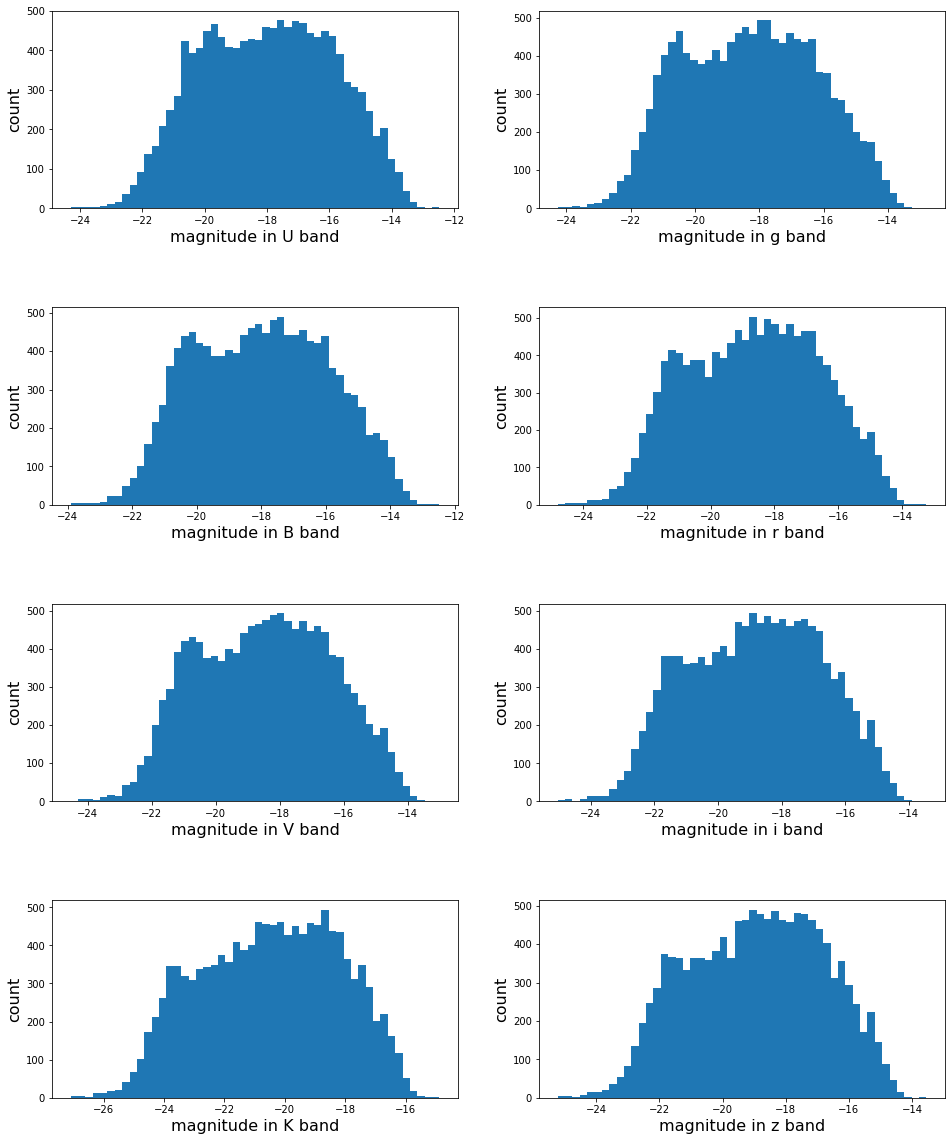

In [151]:

'''
Cuts applied thus far:
removed 9.9*10^36 magnitude
'''

fig, ax = plt.subplots(4,2)
fig.set_size_inches(16,20)
plt.subplots_adjust(hspace = 0.5)
band_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
for bands in range(8):
    mag = subhalo_table['SubhaloStellarPhotometrics'][:,bands]
    ax[bands%4][bands//4].hist(mag, bins=50)
    ax[bands%4][bands//4].set_xlabel('magnitude in ' + band_names[bands] + " band", fontsize = 16 )
    ax[bands%4][bands//4].set_ylabel('count', fontsize = 16)

plt.show()

mag = subhalo_table['SubhaloStellarPhotometrics']
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]


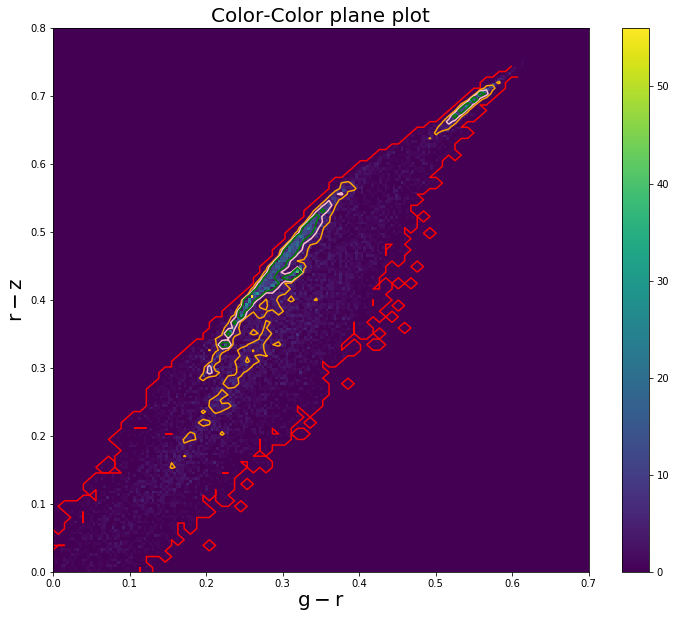

In [152]:
plt.figure(figsize=(12,10))
heights, gmr, rmz = np.histogram2d(g_minus_r,r_minus_z,bins=150)
plt.hist2d(r_minus_z, g_minus_r , bins = 200, cmap='viridis', range=[[0, 0.7], [0, 0.8]])
plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
plt.ylabel("$\mathrm{r-z}$", fontsize = 20)
plt.title("Color-Color plane plot", fontsize = 20)
plt.colorbar()


levels = np.linspace(0, 40,num=4)
plt.contour(rmz[0:150], gmr[0:150], heights, levels=levels, extent=[0,0,0.7,0.8], colors=['red','orange','pink','green'])